In [1]:
%matplotlib notebook 
import math
import triangle
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## 3D plotting 
slide 2

The function $f(x,y)$

In [53]:
@np.vectorize  # makes numpy easier
def f(x,y):
    return x*y*np.exp(-x)

The domain $D$

In [60]:
X=np.linspace(0, 5,40,endpoint=True)
Y=np.linspace(0,10,40,endpoint=True)

In [61]:
Xs,Ys=np.meshgrid(X,Y)  # create a 2D grid
Zs = f(Xs,Ys)

Plot it

<IPython.core.display.Javascript object>


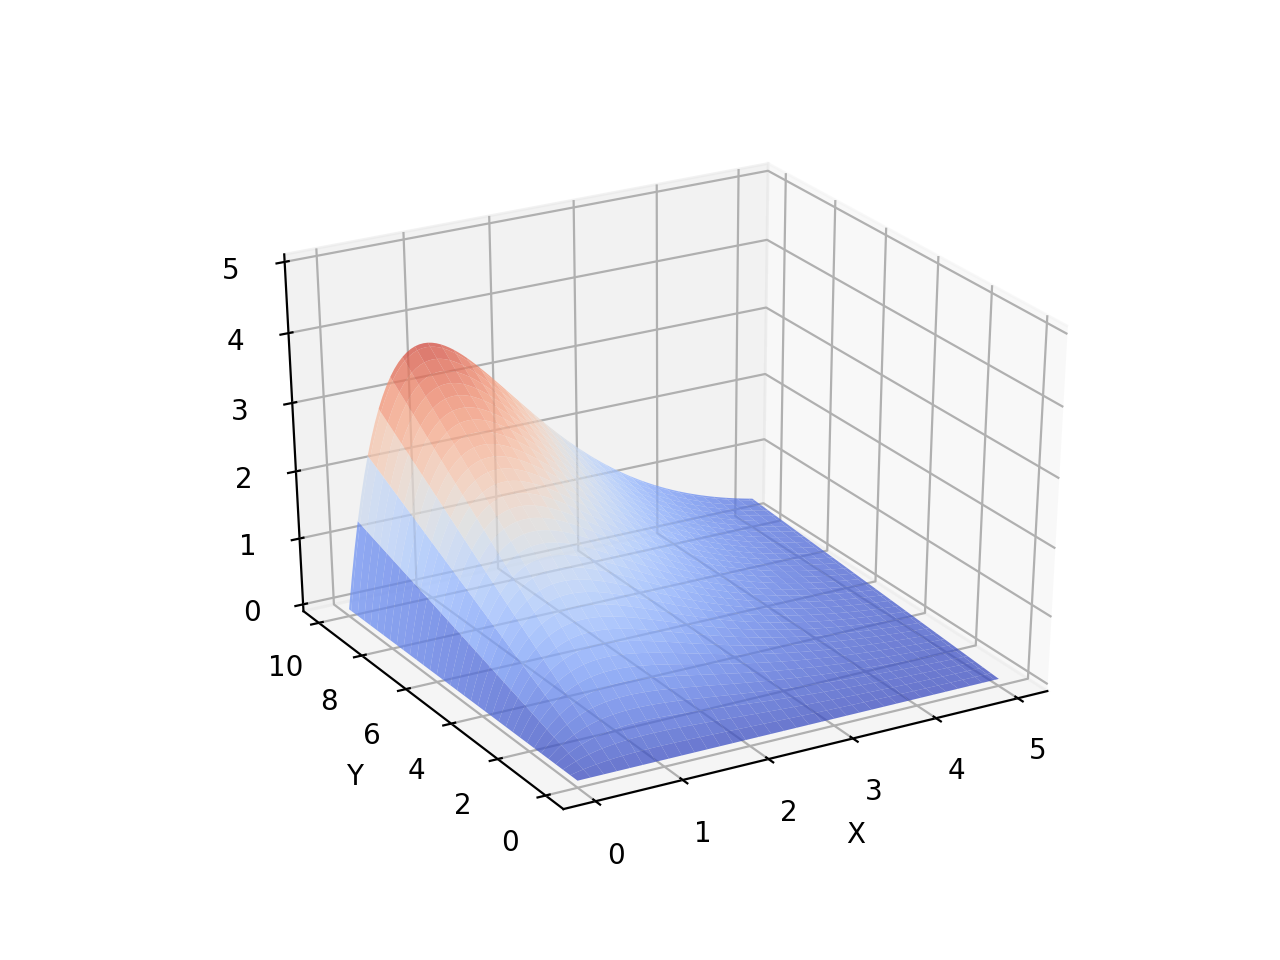

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(0,5)
ax.plot_surface( Xs,Ys,Zs, alpha=0.75,cmap=cm.coolwarm,vmin=0,vmax=4)
ax.view_init(30,-120)

## Add contours

<IPython.core.display.Javascript object>


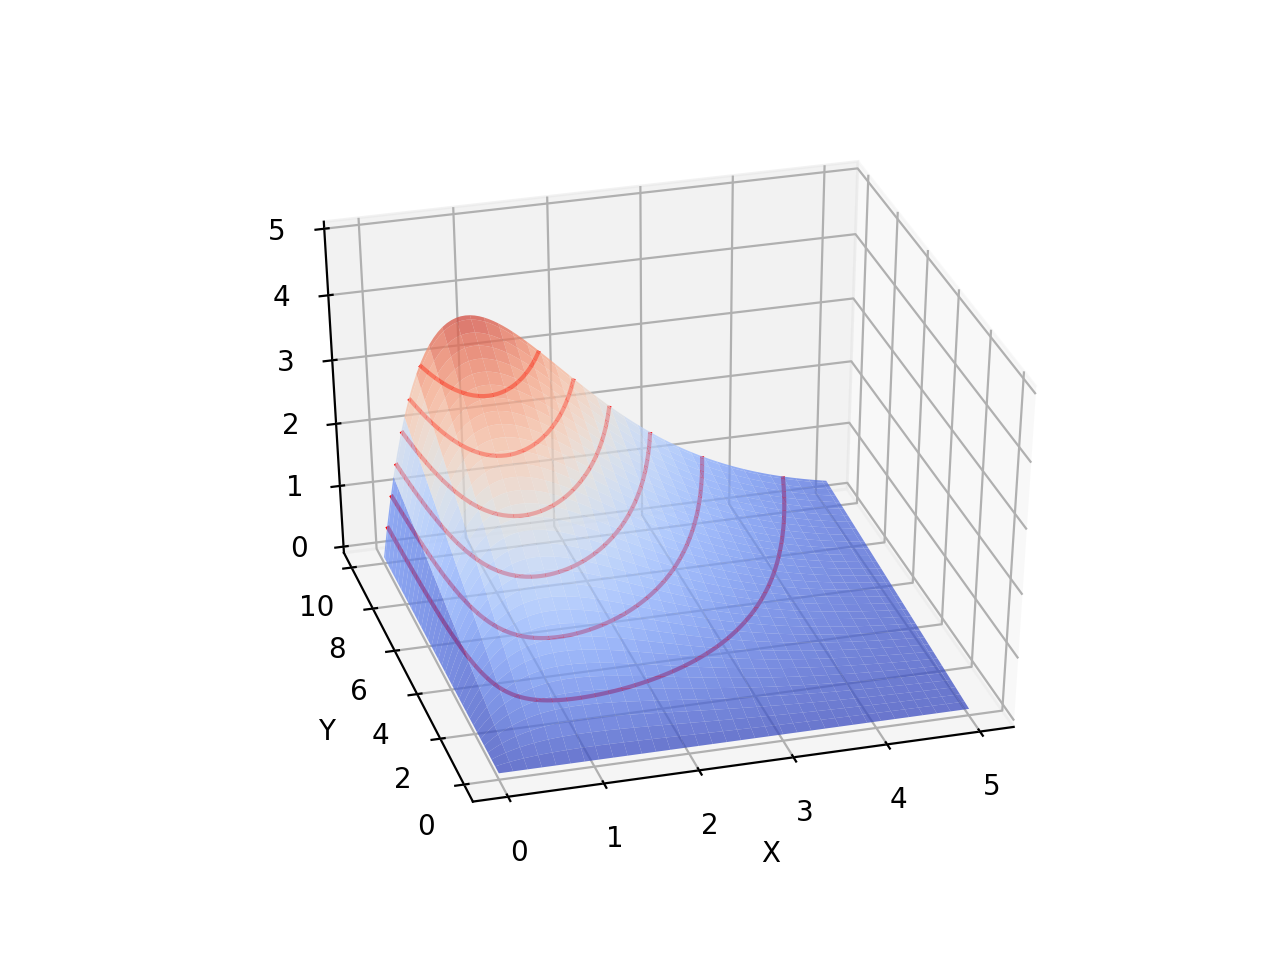

In [8]:
levels=np.arange(0.5,3.5,0.5) # values for the contours

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(0,5)
ax.plot_surface( Xs,Ys,Zs,alpha=0.75,cmap=cm.coolwarm,vmin=0,vmax=4)
cont = ax.contour3D(Xs, Ys, Zs, levels, zorder=1,alpha=1,colors='Red',vmin=0,vmax=4)
ax.view_init(30,-120)

# Plot on a domain

In [63]:
@np.vectorize
def f(x,y):
    return np.sqrt(max(4.-x**2-y**2,0))

In [64]:
X=np.linspace(-3,3,51)
Y=np.linspace(-3,3,51)
Xs,Ys = np.meshgrid(X,Y)
Zs = f(Xs,Ys)

<IPython.core.display.Javascript object>


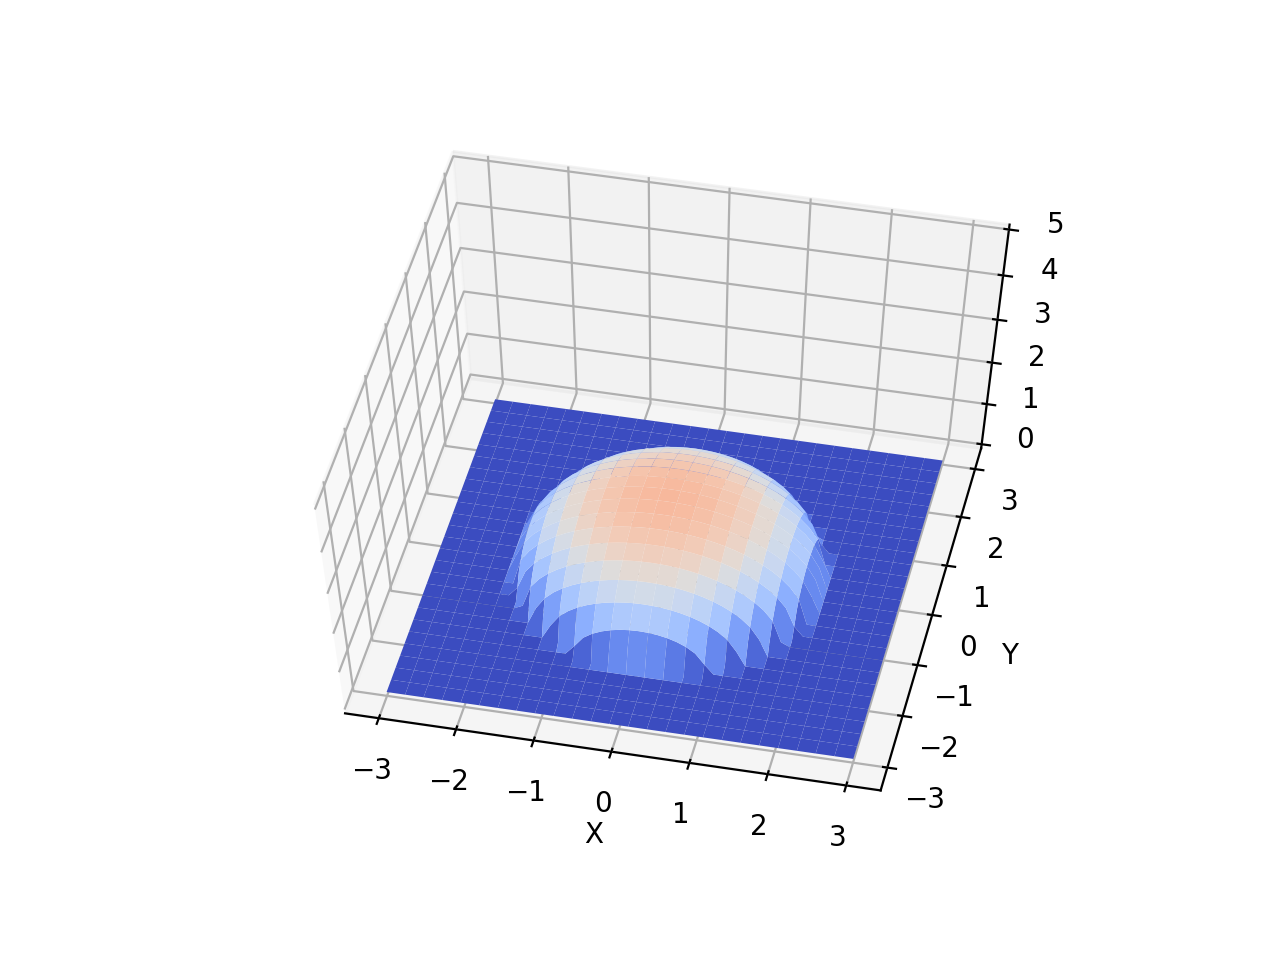

In [65]:

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(0,5)
ax.plot_surface( Xs,Ys,Zs,alpha=1,cmap=cm.coolwarm,vmin=0,vmax=3)

In [66]:
def create_mesh( pathXY, minArea=0.05 ):
    N=len(pathXY)
    i=np.arange(N)
    segs=np.stack([i, i + 1], axis=1) % N
    tri=triangle.triangulate({'vertices':pathXY,'segments':segs},'qpa{}'.format(minArea))
    return tri

In [67]:
t = np.linspace(0,2*np.pi,63)
#path = np.stack((2*np.sin(t),2*np.cos(t)),axis=1)        # circle
path = np.stack((0.6*np.sin(3*t)+1.1*np.sin(t),2*np.cos(t)),axis=1)  # not a circle 

<IPython.core.display.Javascript object>


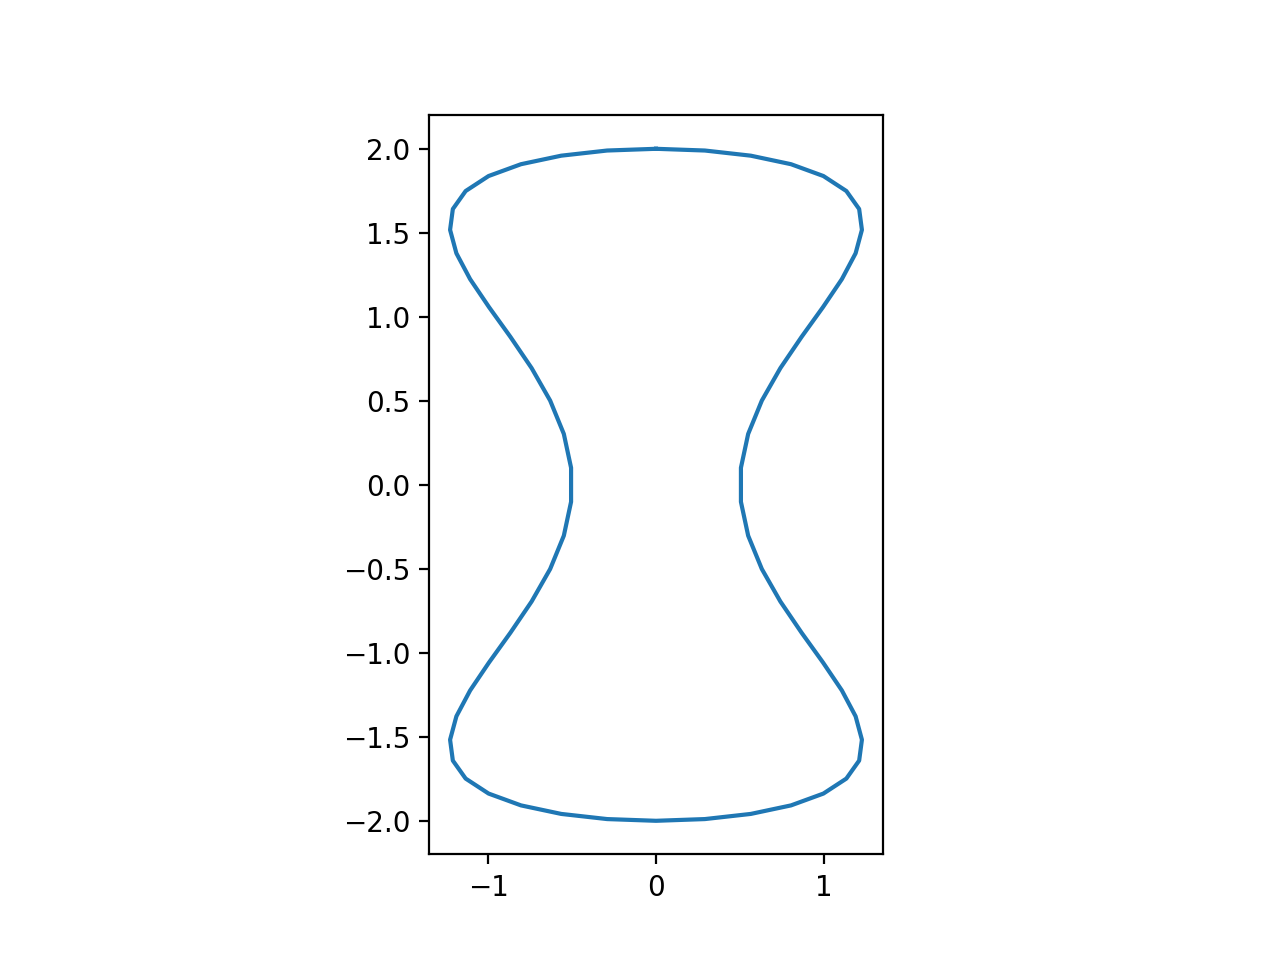

In [68]:
fig,ax = plt.subplots(1,1)
ax.plot(path[:,0],path[:,1])
ax.set_aspect('equal')

In [73]:
tri=create_mesh(path,minArea=0.1)

<IPython.core.display.Javascript object>


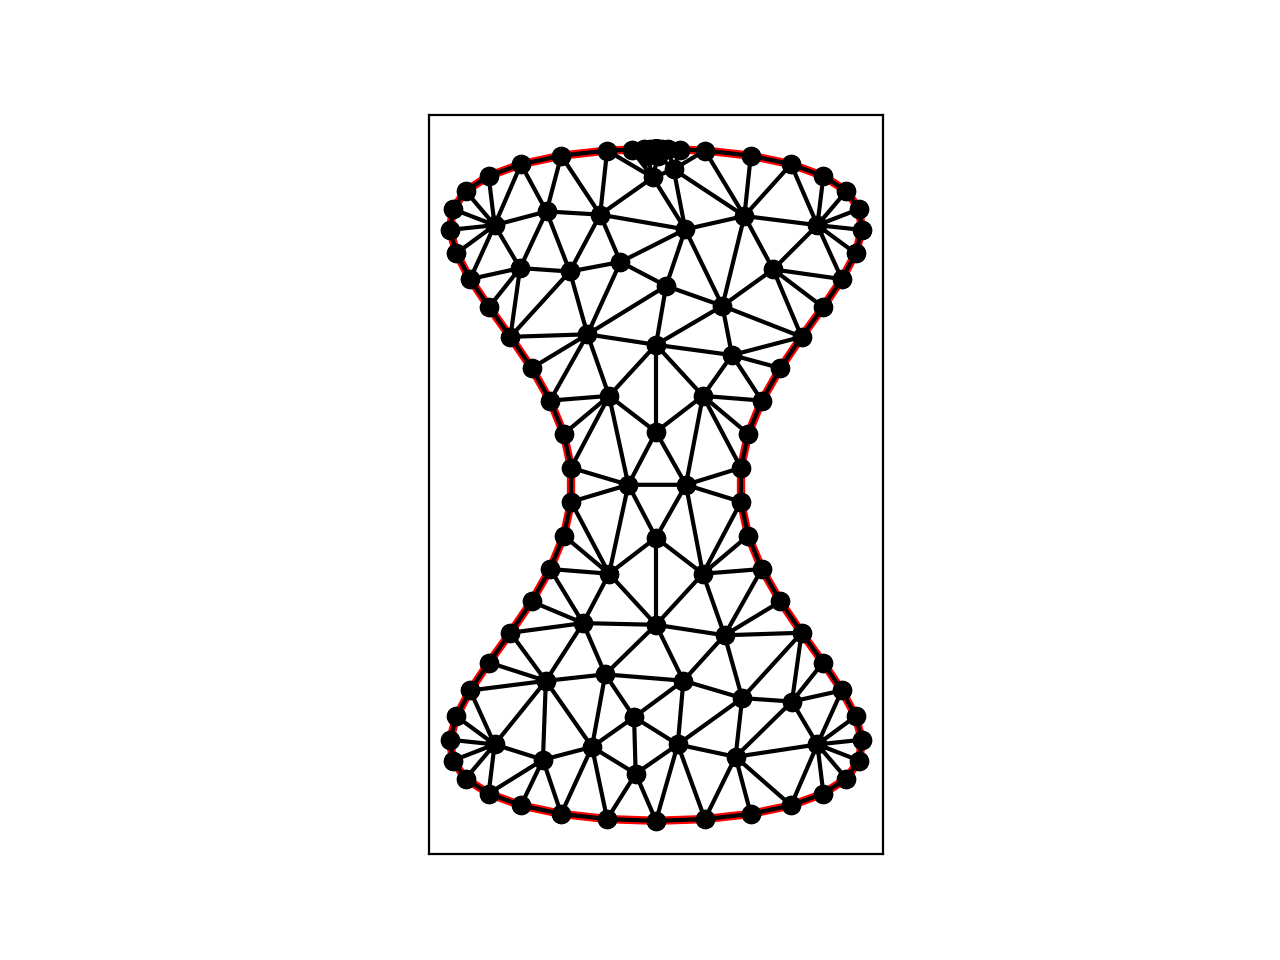

In [74]:
fig,ax = plt.subplots(1,1)
triangle.plot(ax,**tri)

<IPython.core.display.Javascript object>


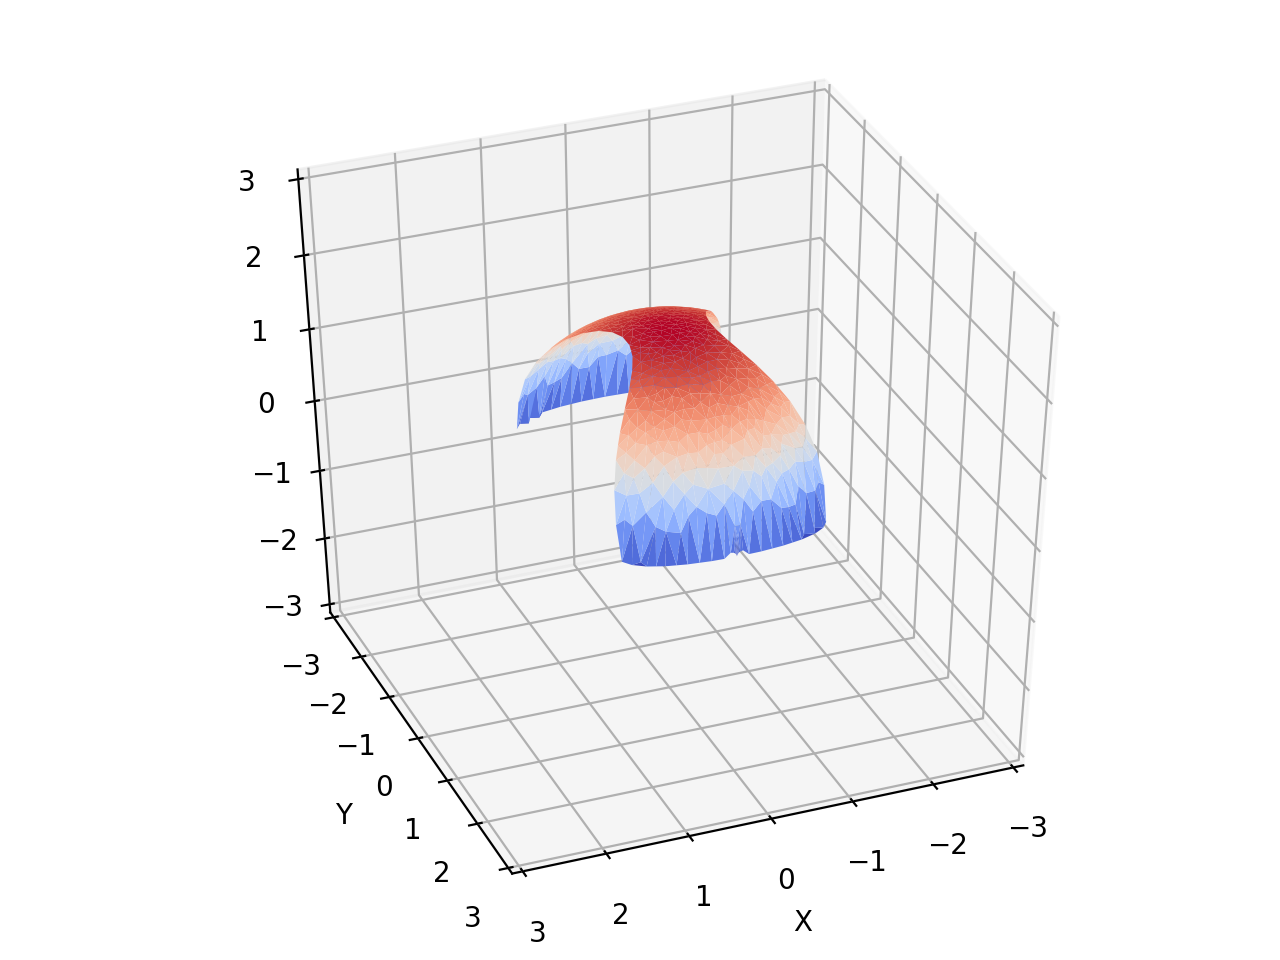

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)

tri = create_mesh(path,minArea=0.01)
XY,triangles=tri['vertices'],tri['triangles']
Z=f(XY[:,0],XY[:,1])
ax.plot_trisurf(XY[:,0],XY[:,1],Z,triangles=triangles,cmap=cm.coolwarm)

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1,1,1.4,1]))
ax.view_init(30,-120)

# Slicing
slide 6

In [27]:
@np.vectorize
def f(x,y):
    return x**2+y**2

The domain $D$

In [28]:
X=np.linspace(-2,2,101,endpoint=True)
Y=np.linspace(-2,2,101,endpoint=True)

In [29]:
Xs,Ys = np.meshgrid(X,Y)
Zs = f(Xs,Ys)

In [30]:
color_dict=dict(cmap=cm.coolwarm,vmin=0,vmax=4)

<IPython.core.display.Javascript object>


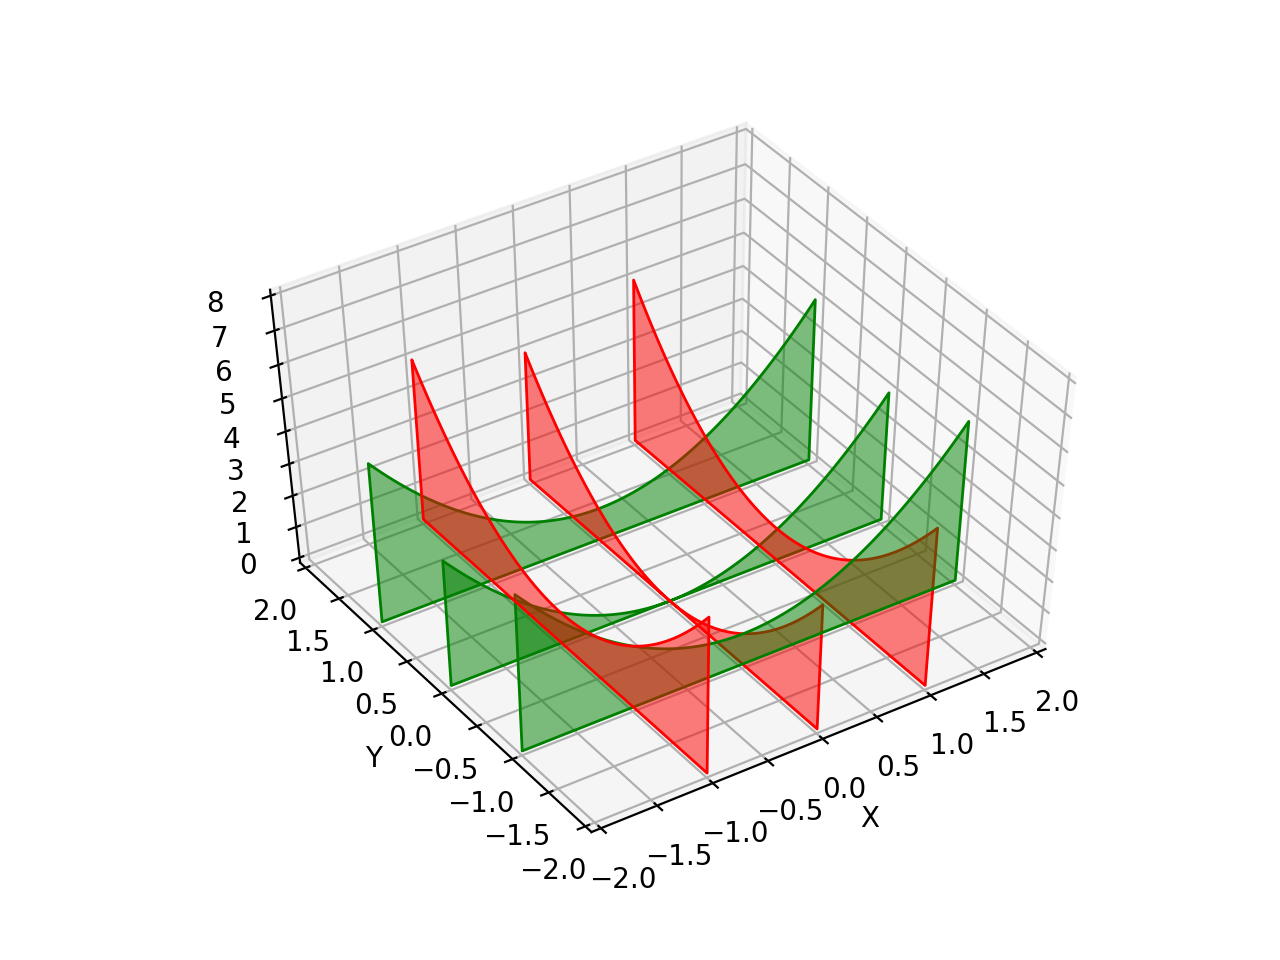

In [37]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(0,8)

X=np.linspace(-2,2,101,endpoint=True)
Y=np.linspace(-2,2,101,endpoint=True)
for k in [-1,0,+1]:
    Yk = k*np.ones(len(X))
    verts = np.concatenate([np.stack((X,Yk,f(X,Yk)),axis=1),[[max(X),k,0],[min(X),k,0]]],axis=0)
    ax.add_collection3d(Poly3DCollection([verts],color='Green',alpha=0.5))

for k in [+1,0,-1]:
    Xk = k*np.ones(len(Y))
    verts = np.concatenate([np.stack((Xk,Y,f(Xk,Y)),axis=1),[[k,max(Y),0],[k,min(Y),0]]],axis=0)
    ax.add_collection3d(Poly3DCollection([verts],color='Red',alpha=0.5))
ax.view_init(40,-160)

<IPython.core.display.Javascript object>


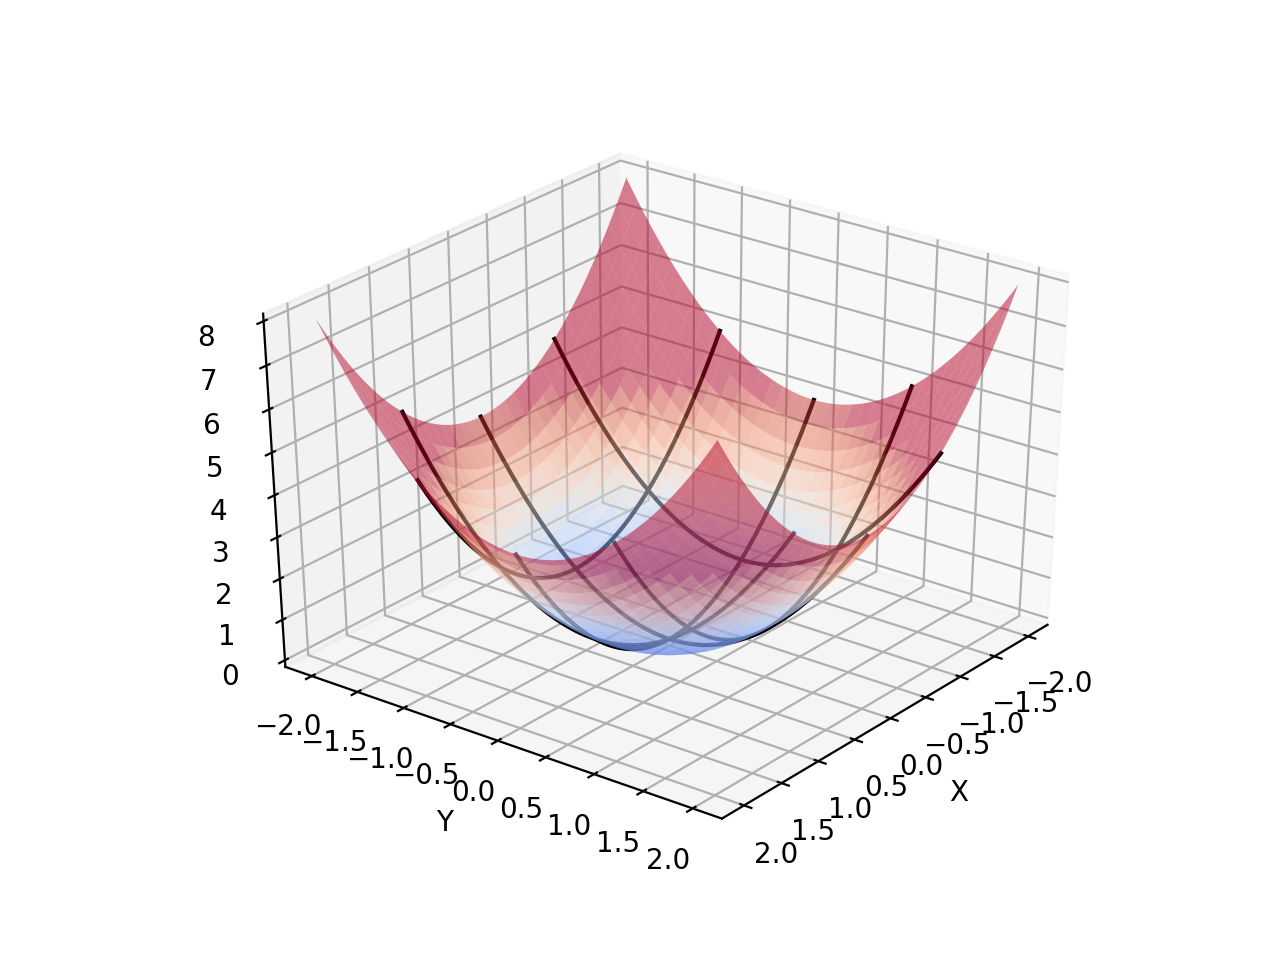

In [38]:
X=np.linspace(-2,2,101,endpoint=True)
Y=np.linspace(-2,2,101,endpoint=True)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot_surface( Xs,Ys,Zs,alpha=0.5,**color_dict)

for k in [-1,0,1]:
    ax.plot( X,k*np.ones_like(X), f(X,k),color='Black')

    ax.plot( k*np.ones_like(Y),Y, f(k,Y),color='Black')


<IPython.core.display.Javascript object>


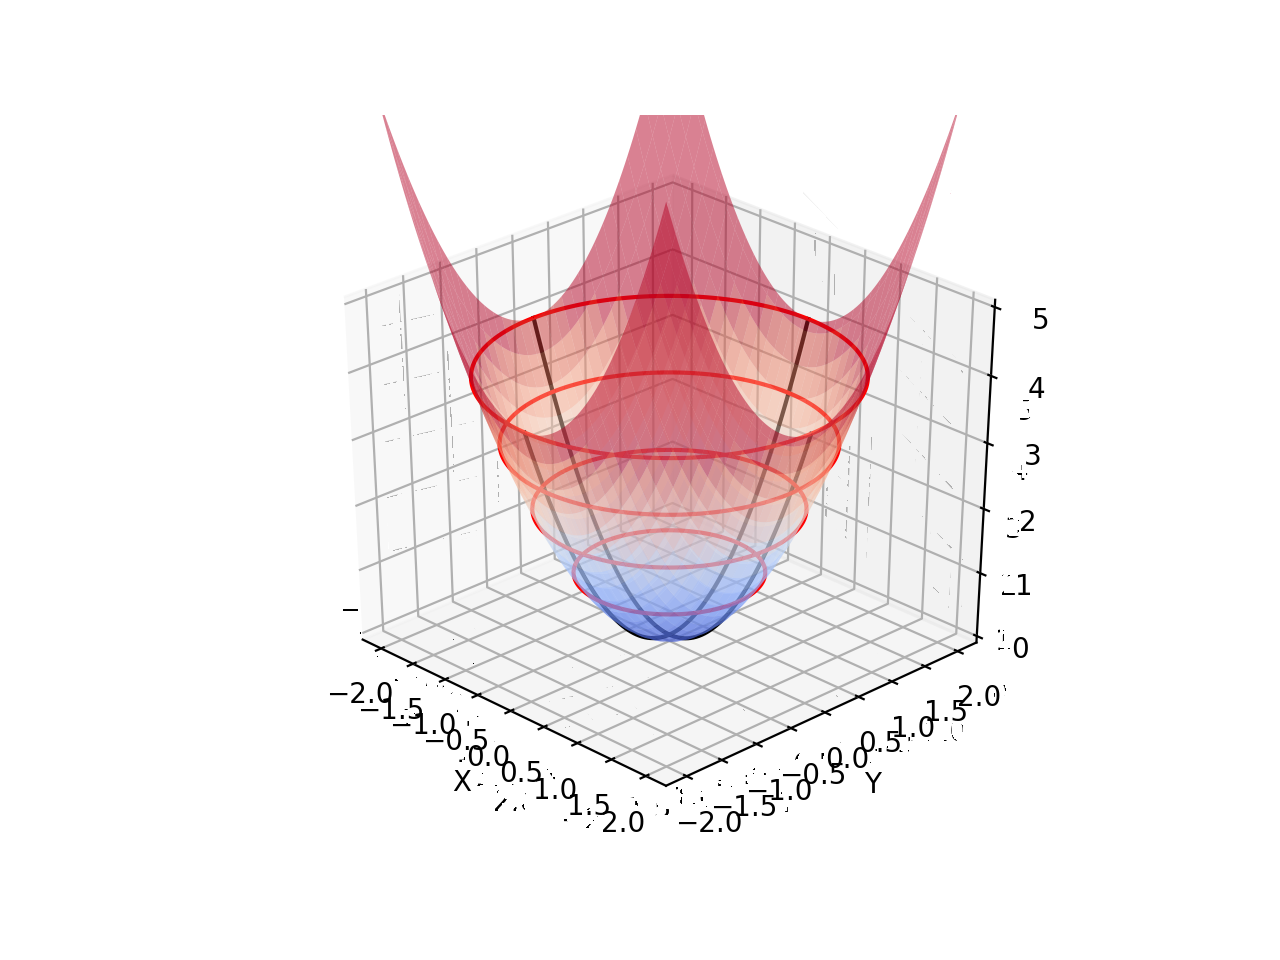

In [39]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot_surface( Xs,Ys,Zs,alpha=0.5,**color_dict)

k=0
ax.plot( X,k*np.ones_like(X), f(X,k),color='Black')

ax.plot( k*np.ones_like(Y),Y, f(k,Y),color='Black')
ax.set_zlim(0,5)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.8,0.8,1,1]))

cont = ax.contour3D(Xs, Ys, Zs, [1,2,3,4], zorder=1,alpha=1,colors='Red',vmin=0,vmax=4)

In [40]:
X=np.linspace(0,2,101,endpoint=True)
Y=np.linspace(0,2,101,endpoint=True)

In [41]:
Xs,Ys = np.meshgrid(X,Y)
Zs = f(Xs,Ys)
t = np.linspace(0,np.pi/2.,101)
path = np.concatenate([np.stack((2*np.cos(t),2*np.sin(t)),axis=1),[[0,0]]],axis=0)
tri=create_mesh(path,minArea=0.01)

<IPython.core.display.Javascript object>


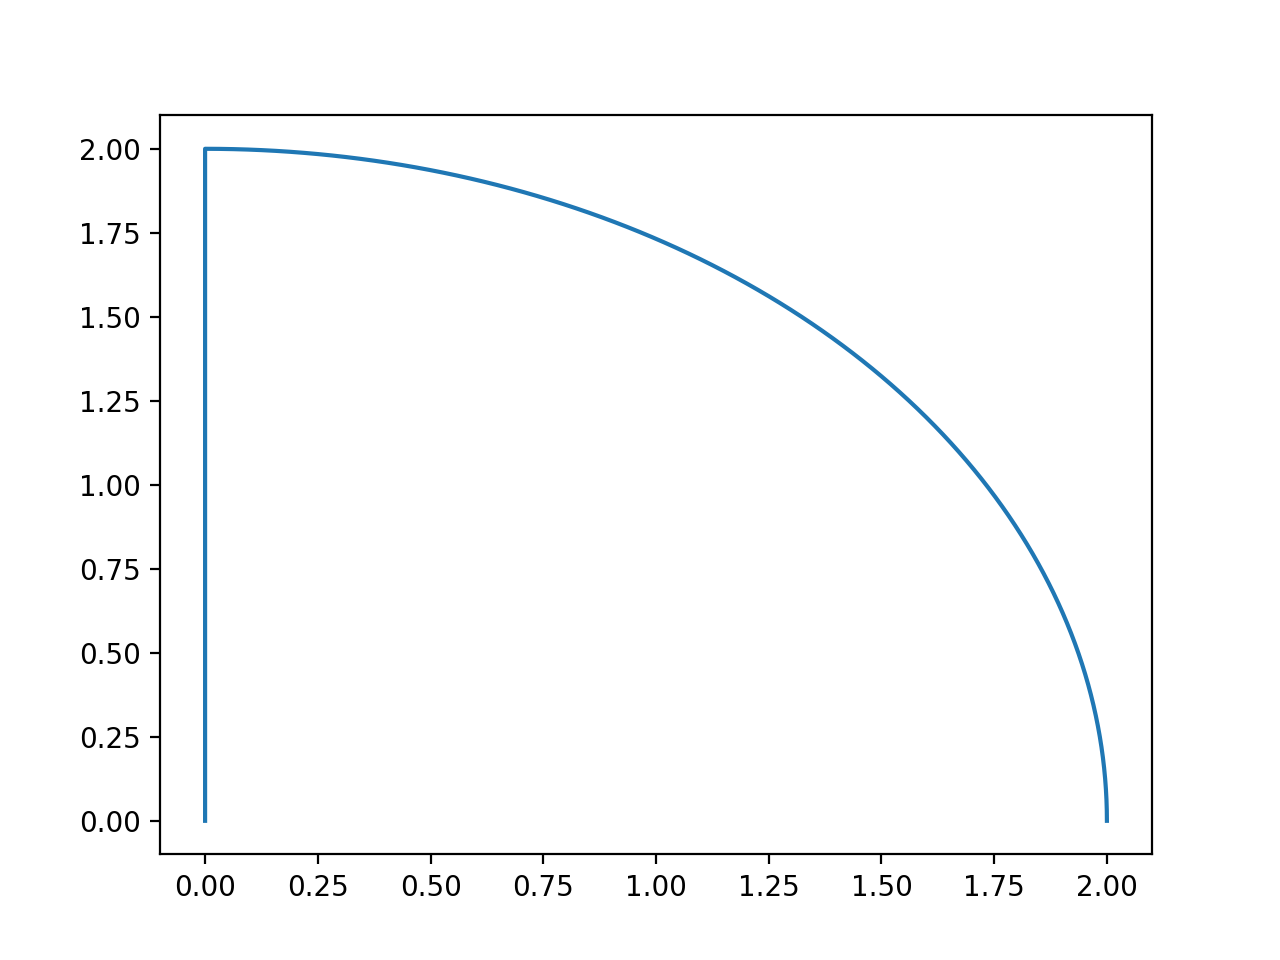

In [42]:
fig,ax = plt.subplots()
plt.plot(path[:,0],path[:,1])

<IPython.core.display.Javascript object>


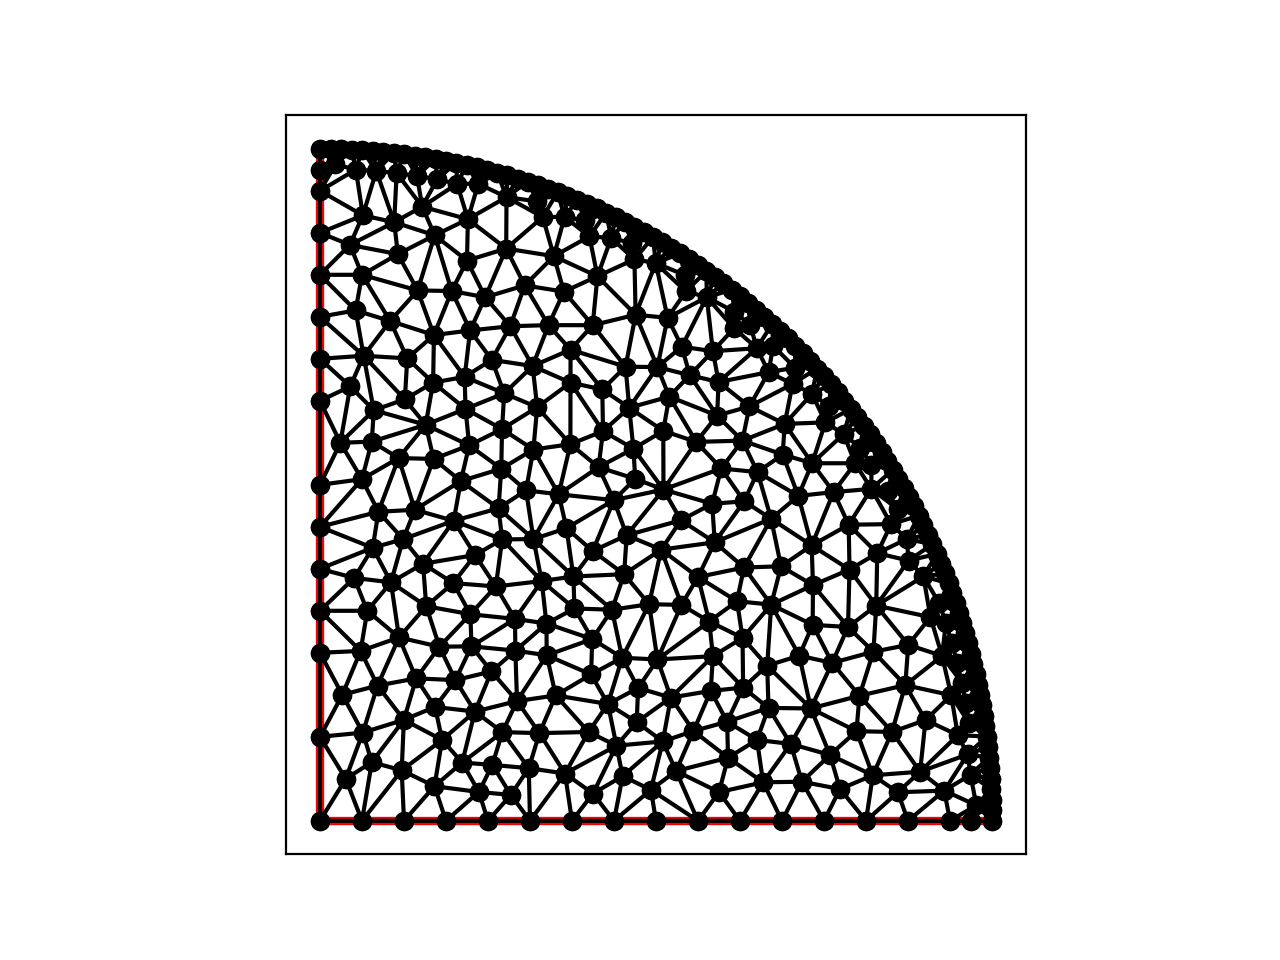

In [43]:
fig,ax=plt.subplots(1,1)
triangle.plot(ax,**tri)

<IPython.core.display.Javascript object>


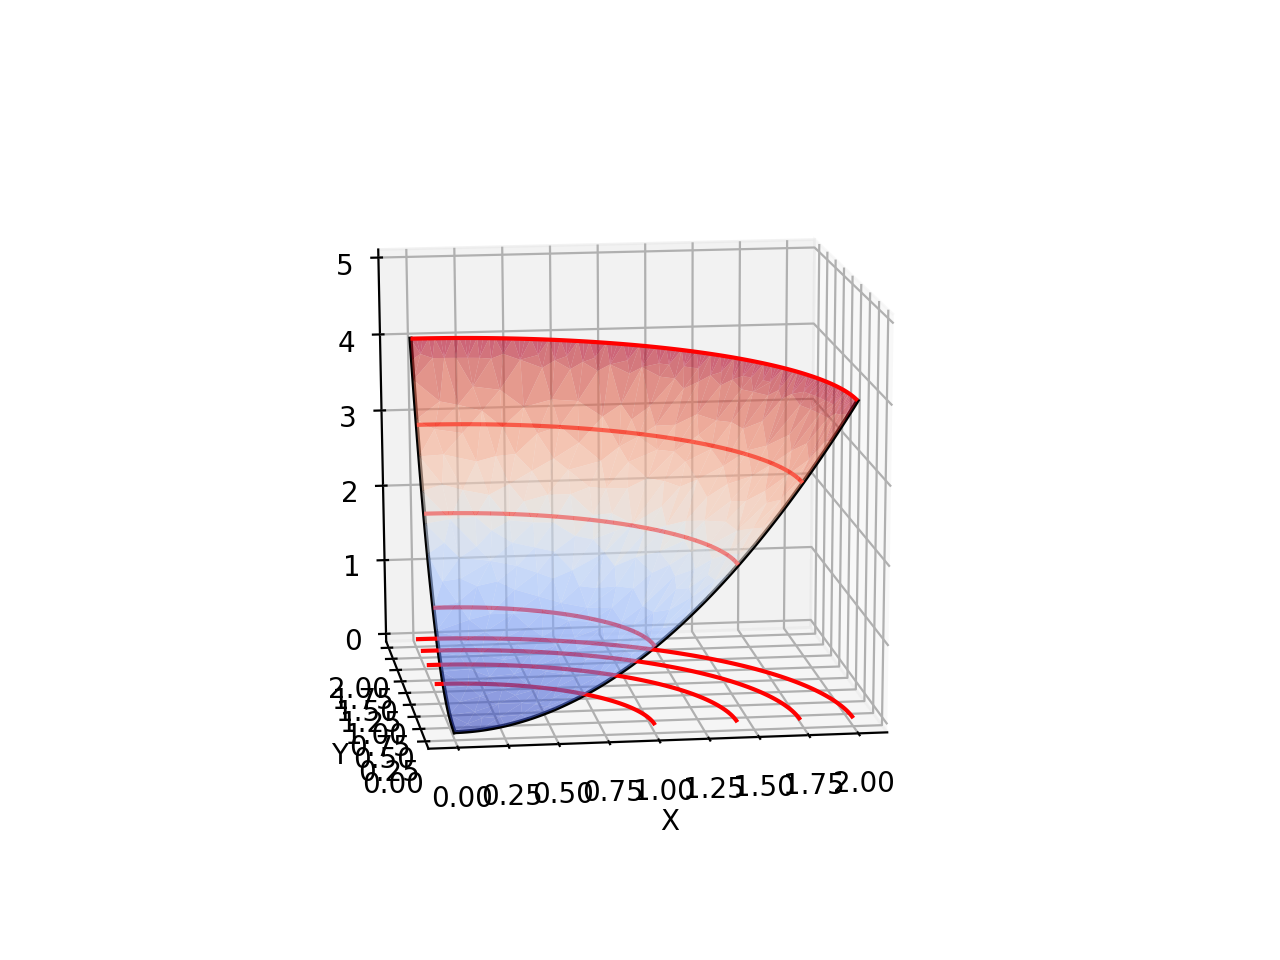

In [46]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
#ax.plot_surface( Xs,Ys,Zs,alpha=0.5,**color_dict)
tri = create_mesh(path,minArea=0.01)
XY,triangles=tri['vertices'],tri['triangles']
Z=f(XY[:,0],XY[:,1])
ax.plot_trisurf(XY[:,0],XY[:,1],Z,triangles=triangles,cmap=cm.coolwarm,alpha=0.6)


k=0
ax.plot( X,k*np.ones_like(X), f(X,k),color='Black')

ax.plot( k*np.ones_like(Y),Y, f(k,Y),color='Black')
ax.set_zlim(0,5)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.8,0.8,1,1]))
cont = ax.contour3D(Xs, Ys, Zs, [1,2,3,4], offset=0,alpha=1,colors='Red',vmin=0,vmax=4)
cont = ax.contour3D(Xs, Ys, Zs, [1,2,3,4], zorder=1,alpha=1,colors='Red',vmin=0,vmax=4)

# Contours 
slide 5

In [47]:
@np.vectorize  # makes numpy easier
def f(x,y):
    return x*y*np.exp(-x)

The domain $D$

In [48]:
X=np.linspace(0, 5,101,endpoint=True)
Y=np.linspace(0,10,101,endpoint=True)

In [49]:
Xs,Ys=np.meshgrid(X,Y)  # create a 2D grid
Zs = f(Xs,Ys)

<IPython.core.display.Javascript object>


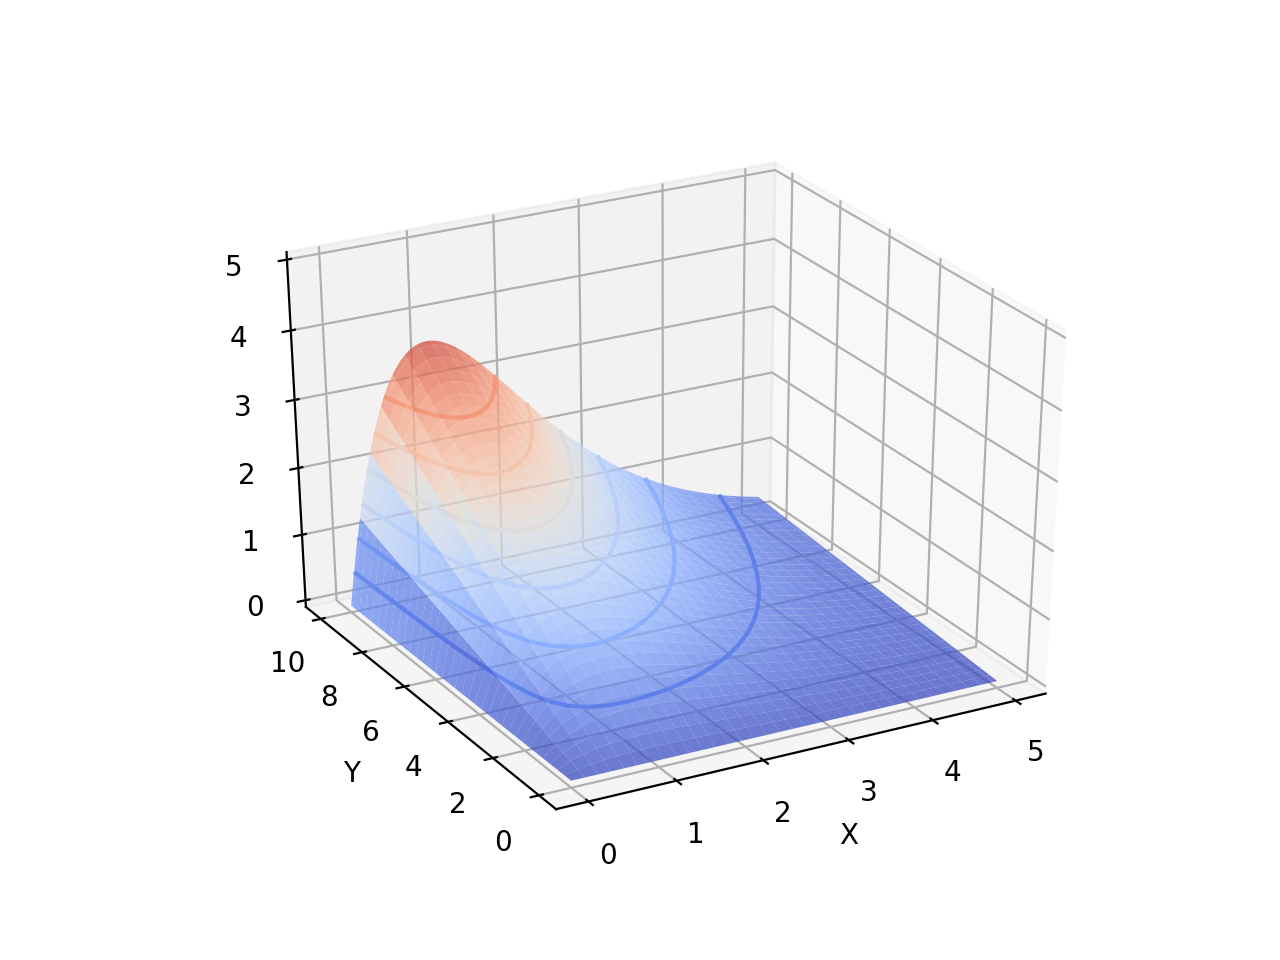

In [50]:
color_dict=dict(cmap=cm.coolwarm,vmin=0,vmax=4)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(0,5)
ax.plot_surface( Xs,Ys,Zs,alpha=0.75,**color_dict)
cont = ax.contour3D(Xs, Ys, Zs, levels, **color_dict)
ax.view_init(30,-120)

<IPython.core.display.Javascript object>


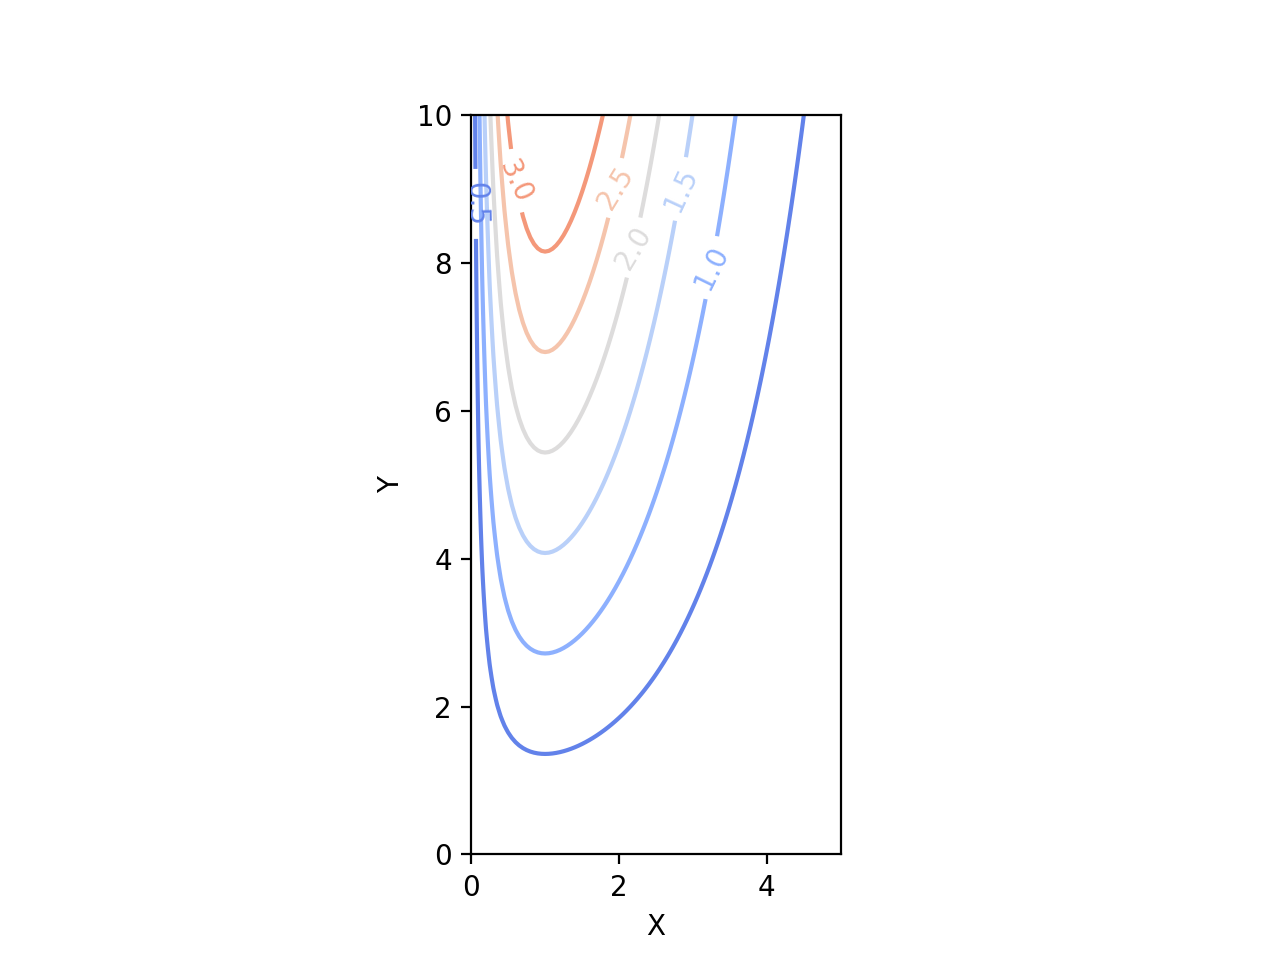

In [51]:
fig,ax = plt.subplots(1,1)
CS=plt.contour(Xs,Ys,Zs,levels=levels,**color_dict)
ax.clabel(CS, CS.levels,fmt="%.1f")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')


# 3D plot in sympy

In [ ]:
from sympy import Symbol, sqrt
from sympy.plotting import plot3d

In [ ]:
x = Symbol('x',real=True)
y = Symbol('y',real=True)
p=plot3d(sqrt(4-x**2-y**2),(x,-3,3),(y,-3,3),zlim=[0,2],**color_dict)
fig, [ax] = p._backend.fig, p._backend.ax  # get matplotib's figure and axes


ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1,1,1.41,1]))

fig.canvas.draw()